# Analytics of the Bugcrowd programs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [10]:
df_old = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")
df_new = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/Bugcrowd_industry-asc_24.12.csv")

In [12]:
df_new.columns


Index(['Title', 'Image', 'ccinlineclamp2_URL', 'ccinlineclamp2',
       'bcprogramcard__byline', 'bcstat', 'Info', 'bcbtn_URL', 'bcbtn',
       'Vulnearbilities_rewarded', 'Validation_within', 'Average_payout',
       'Number_people', 'Hall_of_famers', 'P1', 'P2', 'P3', 'P4',
       'Programm_rules'],
      dtype='object')

In [14]:
df_old.columns


Index(['Titel', 'Reward', 'Program_link', 'Short_Description',
       'Is_Safe_harbor', 'User', 'Vulnearbilities_rewarded',
       'Validation_within', 'Average_payout', 'P1_iOS_Android_API', 'P1_Web',
       'P2_iOS_Android_API', 'P2_Web', 'P3_iOS_Android_API', 'P3_Web',
       'P4_iOS_Android_API', 'P4_Web', 'Hall_of_famers', 'Num_Hacks',
       'Scope_Target_Mobile_API', 'Scope_Target_Web_Targets', 'Cash_Out',
       'Technology', 'Focus_areas'],
      dtype='object')

## Vulnerability plotting

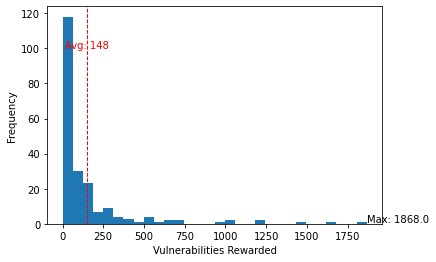

In [1]:
# read the CSV file into a DataFrame
df = pd.read_csv("./data-octa/BugCrowd-Program-V3.csv")

# print the maximum and minimum values of the Vulnerabilities_rewarded column
max_value = df["Vulnearbilities_rewarded"].max()

# create a histogram of the Vulnerabilities_rewarded column
df["Vulnearbilities_rewarded"].plot.hist(bins=30)
plt.xlabel("Vulnerabilities Rewarded")
plt.ylabel("Frequency")
plt.text(max_value, 1, "Max: " + str(max_value))


avg = df["Vulnearbilities_rewarded"].mean()
plt.axvline(avg, color="r", linestyle="dashed", linewidth=1)
plt.text(avg, 100, "Avg: " + str(int(avg)), ha="center", color="r")

plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/Vulnearbilities_rewarded.png")





## Average payout plotting

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/3818711280.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Average_payout"] = df["Average_payout"].str.replace("$", "").str.replace(",", "")


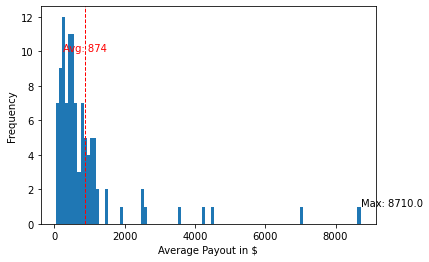

In [2]:
# read the CSV file into a DataFrame
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")

# remove the $ sign and the comma from the Average_payout column
df["Average_payout"] = df["Average_payout"].str.replace("$", "").str.replace(",", "")






# convert the Average_payout column to a numeric data type
df["Average_payout"] = pd.to_numeric(df["Average_payout"])
avg = df["Average_payout"].mean()

max_value = df["Average_payout"].max()
# create a histogram of the Average_payout column
df["Average_payout"].plot.hist(bins=100)

# label the x and y axes
plt.xlabel("Average Payout in $")
plt.ylabel("Frequency")

plt.text(max_value, 1, "Max: " + str(max_value))

plt.axvline(avg, color="r", linestyle="dashed", linewidth=1)
plt.text(avg, 10, "Avg: " + str(int(avg)), ha="center", color="r")

# save the figure as a PNG file
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/Average_payout.png")




## Num of white head hackers

Average number of hacks: 526


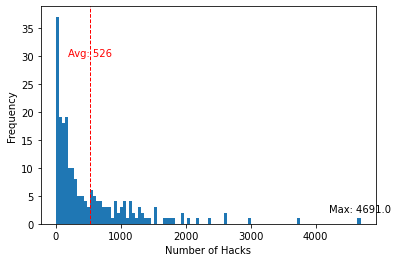

In [3]:
# read the CSV file into a DataFrame
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")


avg = df["Num_Hacks"].mean()

# print the average
print("Average number of hacks:", int(avg))

# convert the Num_Hacks column to a numeric data type
df["Num_Hacks"] = pd.to_numeric(df["Num_Hacks"])

# create a histogram of the Num_Hacks column
df["Num_Hacks"].plot.hist(bins=100)

# add a vertical line at the location of the average
plt.axvline(avg, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
max_value = df["Num_Hacks"].max()
plt.text(max_value, 2, "Max: " + str(max_value),ha="center")

plt.text(avg, 30, "Avg: " + str(int(avg)), ha="center", color="r")

# save the figure as a PNG file
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/Num_hacks.png")




## Reward Average


Total count of values in the reward element column 176
Average reward in $: 3242
[2525.0, 5100.0, 1800.0, 5050.0, 5025.0, 2350.0, 10250.0, 5150.0, 1275.0, 2500.0, 662.5, 662.5, 1575.0, 3135.0, 1325.0, 1825.0, 1325.0, 2312.5, 6100.0, 5050.0, 25050.0, 5075.0, 5125.0, 10100.0, 800.0, 3100.0, 1250.0, 3050.0, 3100.0, 525.0, 5075.0, 1000.0, 1550.0, 3400.0, 3400.0, 3750.0, 2250.0, 2250.0, 1250.0, 1250.0, 2250.0, 1250.0, 1550.0, 2600.0, 1600.0, 1300.0, 12600.0, 3400.0, 3050.0, 4600.0, 3575.0, 15150.0, 2075.0, 3600.0, 1825.0, 3050.0, 3025.0, 2000.0, 2000.0, 850.0, 800.0, 1750.0, 675.0, 2600.0, 1275.0, 12625.0, 2100.0, 1325.0, 1325.0, 1575.0, 1325.0, 1800.0, 2525.0, 1325.0, 800.0, 2575.0, 2350.0, 1325.0, 800.0, 2550.0, 4250.0, 12550.0, 50000.0, 6100.0, 4800.0, 1250.0, 1550.0, 3050.0, 3050.0, 3050.0, 800.0, 1550.0, 2550.0, 1525.0, 2050.0, 2350.0, 1375.0, 1850.0, 2575.0, 4075.0, 1325.0, 1275.0, 5025.0, 2625.0, 625.0, 2500.0, 2550.0, 800.0, 5050.0, 2350.0, 3050.0, 2275.0, 1600.0, 1625.0, 1325.0, 13

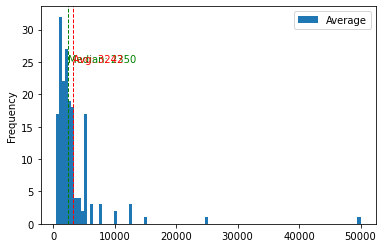

In [35]:
import csv 
import pandas as pd
# Open the CSV file
with open("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv", 'r') as f:
  # Create a CSV reader
  reader = csv.reader(f)
  # Skip the header row
  next(reader)
  total_average = 0
  averages = []
  count = 0
  # Iterate over the rows of the CSV
  for row in reader:
    # Get the reward value from the current row
    reward_range = row[1]

    if reward_range == "":continue
    #Split the reward range on the "-" character
    if "-" in reward_range:
  # Split the string on the "-" character
      count += 1
      lower, upper = reward_range.split("-")
    else:
      # Assign the entire string to the lower variable
      lower = reward_range
      upper = None

    
    # Remove the "$" and "," characters from the strings
    lower = lower.replace("$", "").replace(",", "")
    upper = upper.replace("$", "").replace(",", "") if upper else None

    if "Points" in lower:
      lower = 0

    # Convert the strings to integers

    try :
      lower = int(lower)
      upper = int(upper) if upper else None
    except ValueError:
      print("ValueError", lower, upper)

      continue

    # Calculate the average of the lower and upper bounds
    if upper:
      average = (lower + upper) / 2
      total_average += average
      averages.append(average)
    else:
      average = lower
      total_average += average
      averages.append(average)


  print("Total count of values in the reward element column",count)  
  print("Average reward in $:", int(total_average / count))
  print(averages)
  df = pd.DataFrame(averages, columns=["Average"])
  df.plot.hist(bins=100)
  df_average = df["Average"].mean()
  df_median= df["Average"].median()
  print("this is the median",df_median)
  plt.axvline(df_median, color="g", linestyle="dashed", linewidth=1)
  plt.axvline(df_average, color="r", linestyle="dashed", linewidth=1)
  plt.text(df_median, 25, "Median: " + str(int(df_median)), color="g")
  plt.text(df_average, 25, "Avg: " + str(int(df_average)), color="r")









## Safe Habour Plotted

/Users/patrickahrend/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Safe Harbor: 111
Partial Safe Harbor: 68
Not Safe Harbor: 86


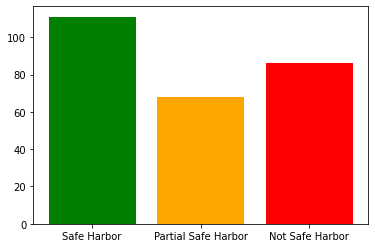

In [5]:
# Initialize lists to store the data
safe_harbor = []
partial_safe_harbor = []
not_safe_harbor = []

# Open the CSV file
with open("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv", 'r') as f:
  # Create a CSV reader
  reader = csv.reader(f)
  
  # Iterate over the rows of the CSV
  for row in reader:
    # Get the "Is_Safe_harbor" value from the current row
    value = row[4]
    
    # Check the value and increment the appropriate list
    if value == "True":
      safe_harbor.append(1)
    elif "Partial safe harbor" in value:
      partial_safe_harbor.append(1)
    else:
      not_safe_harbor.append(1)

# Calculate the lengths of the lists
safe_harbor_count = len(safe_harbor)
print("Safe Harbor:", safe_harbor_count)
partial_safe_harbor_count = len(partial_safe_harbor)
print("Partial Safe Harbor:", partial_safe_harbor_count)
not_safe_harbor_count = len(not_safe_harbor)
print("Not Safe Harbor:", not_safe_harbor_count)

# Create the bar chart
plt.bar(["Safe Harbor", "Partial Safe Harbor", "Not Safe Harbor"], [safe_harbor_count, partial_safe_harbor_count, not_safe_harbor_count], color=["green", "orange", "red"])

# Show the chart
plt.show()


## Num hall of fame 

Text(182, 15, 'Max: 182')

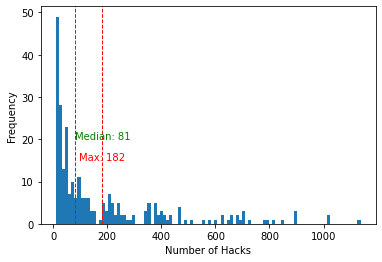

In [56]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/Bugcrowd_industry-asc_24.12.xlsx")

df = df_new["Hall_of_famers"]
df.dropna(inplace=True)

df = df.str.replace("View the hall", "").str.replace("View all ", "")

df = pd.to_numeric(df)
# create a histogram of the Num_Hacks column
df.plot.hist(bins=100)

average = df.mean()
average = int(average)
median = int(df.median())
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
plt.axvline(median, color="g", linestyle="dashed", linewidth=1)
plt.text(median, 20, "Median: " + str(median),ha="left",color="g")
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
plt.text(average, 15, "Max: " + str(average),ha="center",color="r")






In [16]:
df = df_new["Hall_of_famers"]
df.dropna(inplace=True)

for ele in df:
  if ele == "View the hall":
    df.replace(ele, 0, inplace=True)
    

df = pd.to_numeric(df)
# create a histogram of the Num_Hacks column
df.plot.hist(bins=100)

average = df.mean()
average = int(average)
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
plt.text(average, 15, "Max: " + str(average),ha="center",color="r")




ValueError: Unable to parse string "View all 678" at position 0

## Validation within 

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/348671543.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'Validation_within': ele}, ignore_index=True)
/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/348671543.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'Validation_within': ele}, ignore_index=True)
/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/348671543.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'Validation_within': ele}, ignore_index=True)
/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/348671543.py:51: FutureWarning: The frame.append method is dep

Text(122, 35, 'Avg: 122')

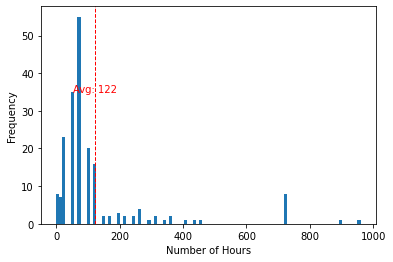

In [7]:
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")

df = df["Validation_within"]
df.dropna(inplace=True)
df.str.replace('\n', '').str.replace('days', '')

df_final = pd.DataFrame()

for ele in df:
    if "$" in ele:
        ele = ele.replace(ele, "0")
        ele = ele.strip()
    if "days" in ele:
        ele = ele.replace("days", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24
        ele = str(ele) + " hours"
    if "day" in ele:
        ele = ele.replace("day", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24
        ele = str(ele) + " hours"
    if "about" in ele:
        ele = ele.replace("about", "")
        ele = ele.strip()
    if "month" in ele:
        ele = ele.replace("month", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24 * 30
        ele = str(ele) + " hours"
    if "minutes" in ele:
        ele = ele.replace("minutes", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 60
        ele = str(ele) + " hours"
    if "hours" in ele:
        ele = ele.replace("hours", "")
        ele = ele.strip()
    if "hour" in ele:
        ele = ele.replace("hour", "")
        ele = ele.strip()
    
    df_final = df_final.append({'Validation_within': ele}, ignore_index=True)

df_final = pd.to_numeric(df_final["Validation_within"])
df_final.plot.hist(bins=100)
average = df_final.mean()
average = int(average)
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hours")
plt.ylabel("Frequency")
plt.text(average, 35, "Avg: " + str(average),ha="center",color="r")
    





# df['Validation_within'] = df['Validation_within'].str.replace('\n', '').str.replace('days', '')
# # Extract the numerical values from the entries
# df['Validation_within'] = df['Validation_within'].str.extract('(\d+)')

# # Convert the column to numeric type
# df['Validation_within'] = pd.to_numeric(df['Validation_within'])

# for element in df['Validation_within']:
#     print(element)


# df_new = pd.DateFrame("Validation_within" , columns=["Validation_within"])
# df.dropna(inplace=True)
# print(type(df))

## Scope Target Mobile

## Scope Target Android, IOS